# Polls vs. Twitter vs. Google Trends

Using 538 polling data: https://github.com/fivethirtyeight/data/tree/master/polls

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
polls = pd.read_csv("presidential_poll_averages_2020.csv")

In [18]:
national_polls = polls[polls.state == "National"]

# Find the unique names for the candidates
national_polls.candidate_name.unique()

array(['Joseph R. Biden Jr.', 'Donald Trump',
       'Convention Bounce for Joseph R. Biden Jr.',
       'Convention Bounce for Donald Trump'], dtype=object)

In [23]:
biden_polls = national_polls[national_polls.candidate_name == "Joseph R. Biden Jr."]
biden_polls.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
24,2020,National,10/29/2020,Joseph R. Biden Jr.,52.08617,52.03194
248,2020,National,10/28/2020,Joseph R. Biden Jr.,51.88797,51.83824
472,2020,National,10/27/2020,Joseph R. Biden Jr.,52.00845,51.94981
696,2020,National,10/26/2020,Joseph R. Biden Jr.,52.31774,52.27547
920,2020,National,10/25/2020,Joseph R. Biden Jr.,52.04554,52.02411


In [22]:
trump_polls = national_polls[national_polls.candidate_name == "Donald Trump"]
trump_polls.head()

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
80,2020,National,10/29/2020,Donald Trump,42.96125,43.18202
304,2020,National,10/28/2020,Donald Trump,42.67053,42.85682
528,2020,National,10/27/2020,Donald Trump,42.54124,42.78127
752,2020,National,10/26/2020,Donald Trump,42.63442,42.84363
976,2020,National,10/25/2020,Donald Trump,42.69447,42.86662


<AxesSubplot:xlabel='modeldate'>

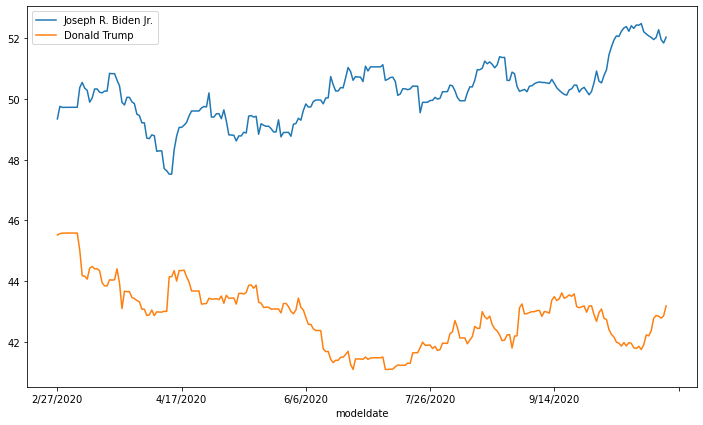

In [34]:
ax = biden_polls[::-1].plot(x='modeldate', y='pct_trend_adjusted', figsize=(12, 7), label="Joseph R. Biden Jr.")
trump_polls[::-1].plot(x='modeldate', y='pct_trend_adjusted', figsize=(12, 7), ax=ax, label="Donald Trump")

## Google Trends

In [35]:
from pytrends.request import TrendReq
import time
import matplotlib
startTime = time.time()
pytrend = TrendReq(hl='en-US', tz=360)

In [92]:
def plot_google_trends(keywords, timeframe, geo, title=""):
    '''
    keywords: list of strings that are keywords
    '''
    # Google trends
    pytrend.build_payload(kw_list=keywords, cat=0, timeframe=timeframe, geo=geo)
    data = pytrend.interest_over_time()
    data = data.drop(labels=['isPartial'],axis='columns')

    data.plot(figsize=(15, 7), ylim=(0, 100), title="Google Trends " + title)
    plt.show()
    return data

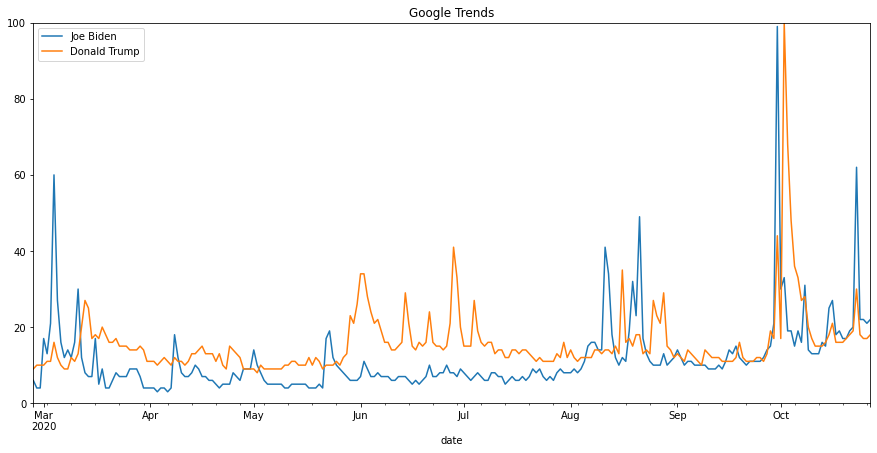

In [49]:
google_trend_candidate_data = plot_google_trends(["Joe Biden", "Donald Trump"], '2020-02-27 2020-10-29', 'US')

<AxesSubplot:xlabel='date'>

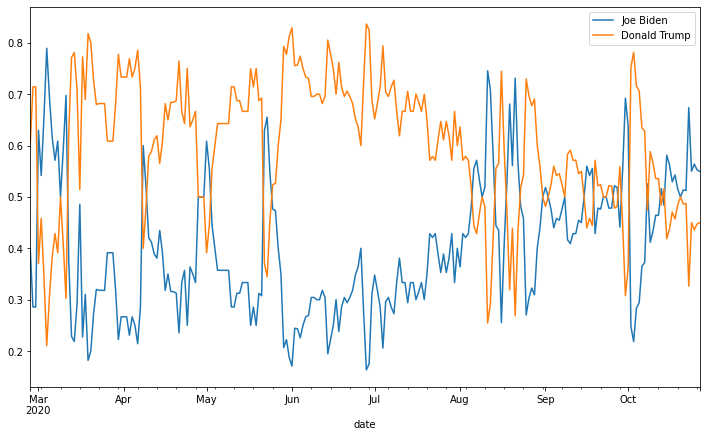

In [70]:
# Percentage Google Trends per candidate dataframe
pct_gt_candidate_df = google_trend_candidate_data.div(google_trend_candidate_data.sum(axis=1), axis=0).reset_index()
ax = pct_gt_candidate_df.plot(x='date', y='Joe Biden', figsize=(12, 7), label="Joe Biden")
pct_gt_candidate_df.plot(x='date', y='Donald Trump', figsize=(12, 7), label="Donald Trump", ax=ax)

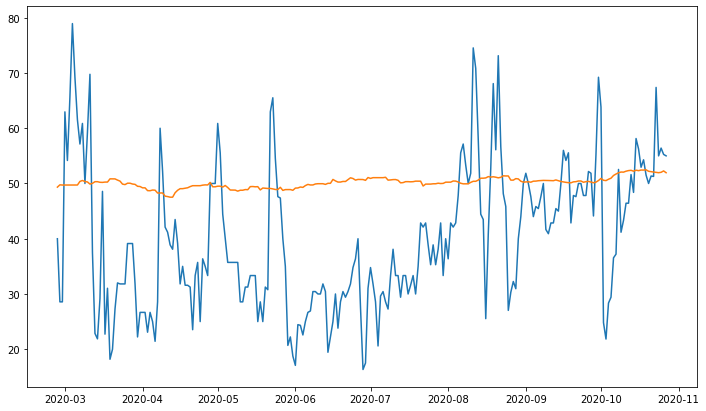

In [83]:
plt.figure(figsize=(12, 7))
plt.plot(pct_gt_candidate_df.date, pct_gt_candidate_df['Joe Biden'] * 100)
plt.plot(pct_gt_candidate_df.date, biden_polls[::-1].iloc[:244].pct_trend_adjusted)
plt.show()

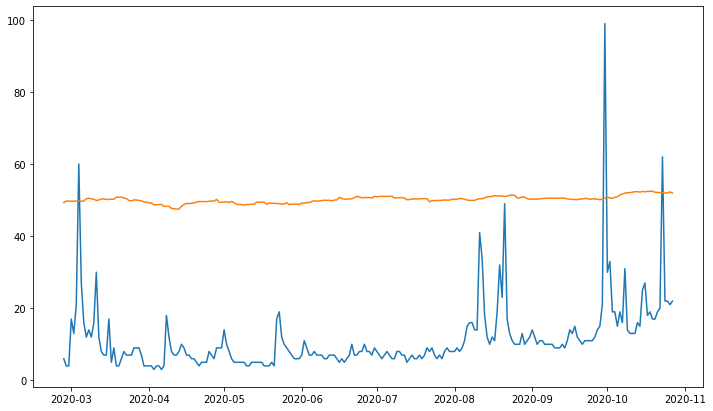

In [86]:
plt.figure(figsize=(12, 7))
plt.plot(pct_gt_candidate_df.date, google_trend_candidate_data['Joe Biden'])
plt.plot(pct_gt_candidate_df.date, biden_polls[::-1].iloc[:244].pct_trend_adjusted)
plt.show()

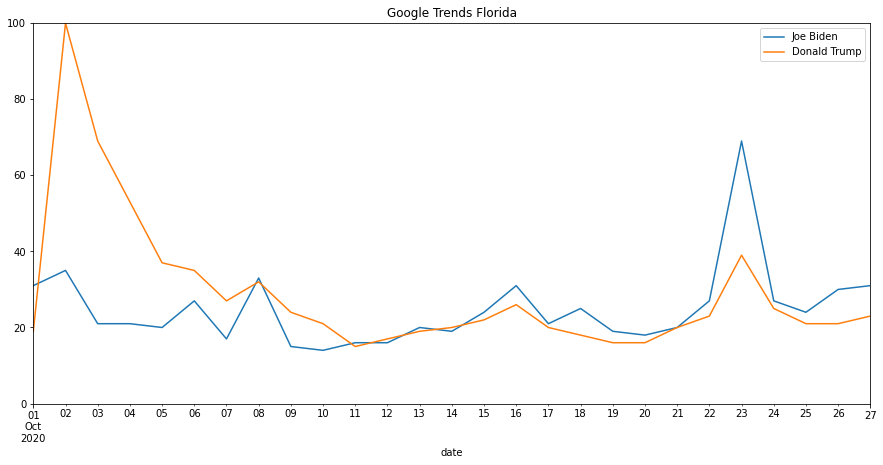

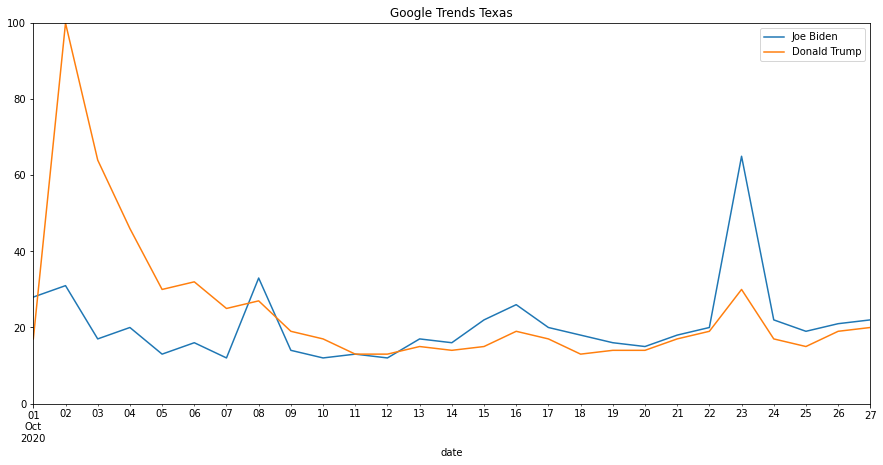

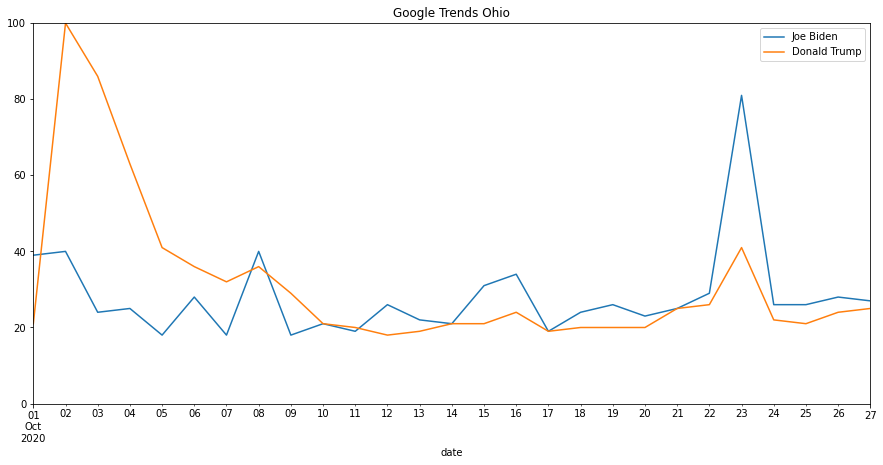

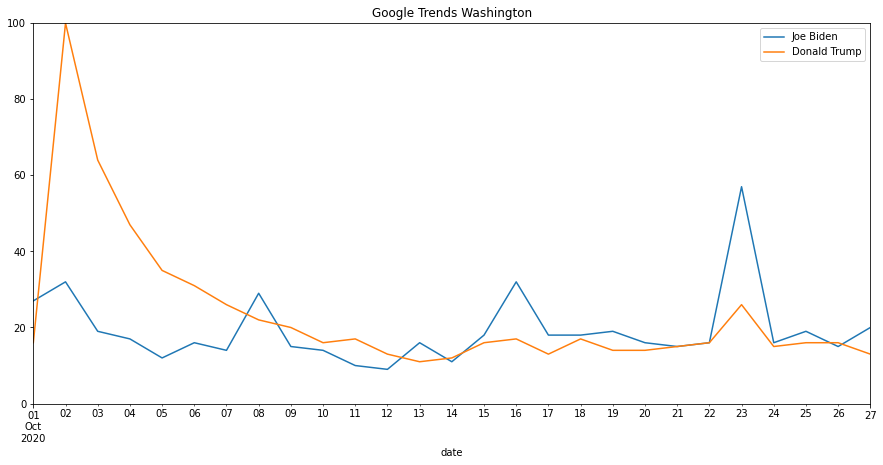

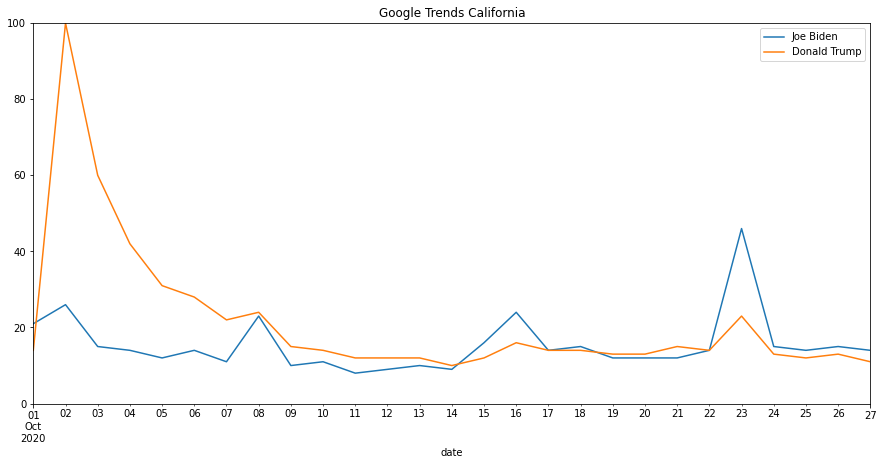

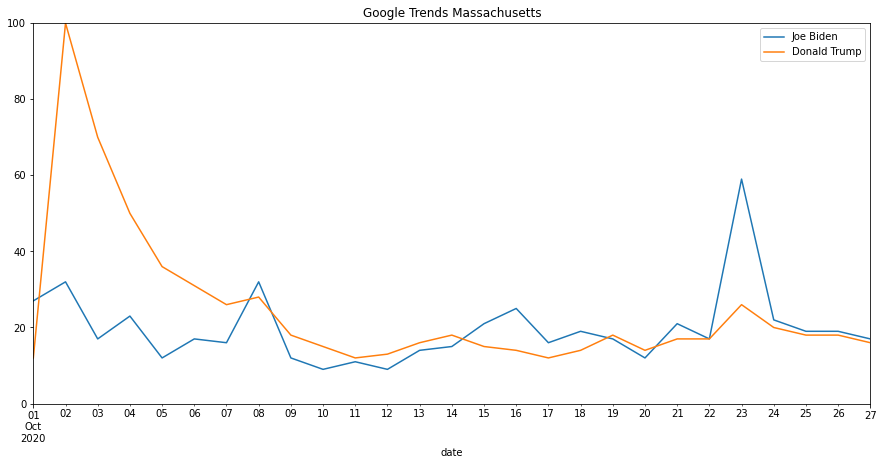

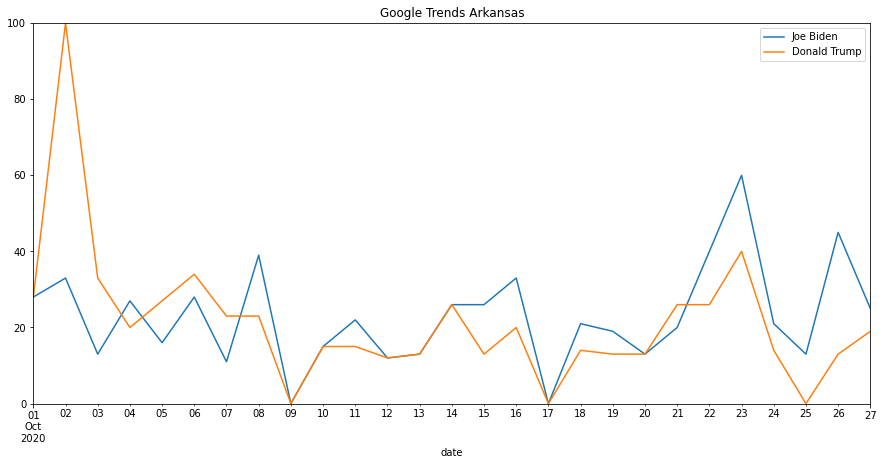

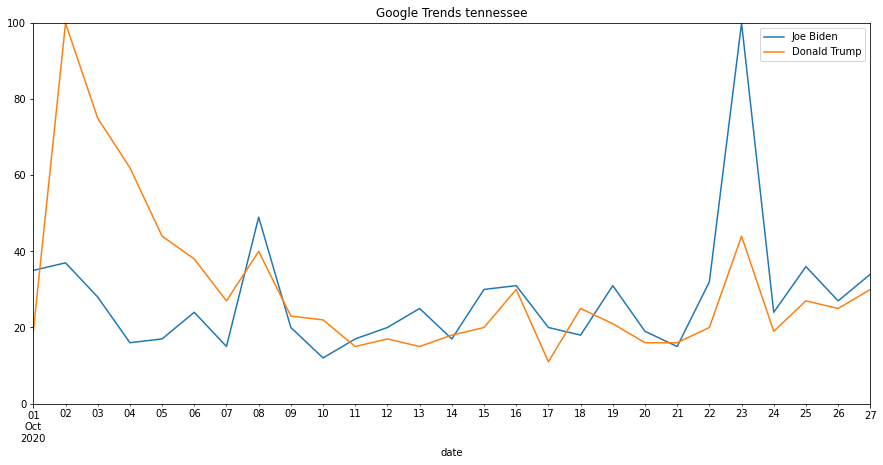

In [95]:
# Google Trends in battleground states
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-FL', "Florida")
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-TX', "Texas")
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-OH', "Ohio")

# Blue States for reference
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-WA', "Washington")
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-CA', "California")
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-MA', "Massachusetts")

# Red States for reference
plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-AK', "Arkansas")
_ = plot_google_trends(["Joe Biden", "Donald Trump"], '2020-10-01 2020-10-29', 'US-TN', "Tennessee")

## Twitter Trends

In [2]:
import os
import sys
shared_path = '/Users/sarah/Downloads/TwitterResearch2020'
sys.path.append(shared_path)
import thinned_tweet_obj
import general_utilities
import gdrive_quickstart, io
from googleapiclient.http import MediaIoBaseDownload

In [4]:
import importlib
importlib.reload(gdrive_quickstart)

<module 'gdrive_quickstart' from '/Users/sarah/Downloads/TwitterResearch2020/gdrive_quickstart.py'>

In [ ]:
DRIVE = gdrive_quickstart.authenticate_drive_api()
file_objs_lst = gdrive_quickstart.get_file_objs_list(DRIVE, 'name contains "combined_tweets-2020"')